In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

In [3]:
df = pd.read_csv('train.csv')
df.head()

,text,label,language
0,wearing a fake engagement ring so guys won’t a...,1.8,English
1,Bees vs. Wasps. http,1.0,English
2,Here is a nice equation: 0+0-0-0+0=0,1.0,English
3,@user @user Enjoy each new day!😊🇨🇦🐞🐭,1.6,English
4,I can be having a perfectly good day then I th...,1.6,English


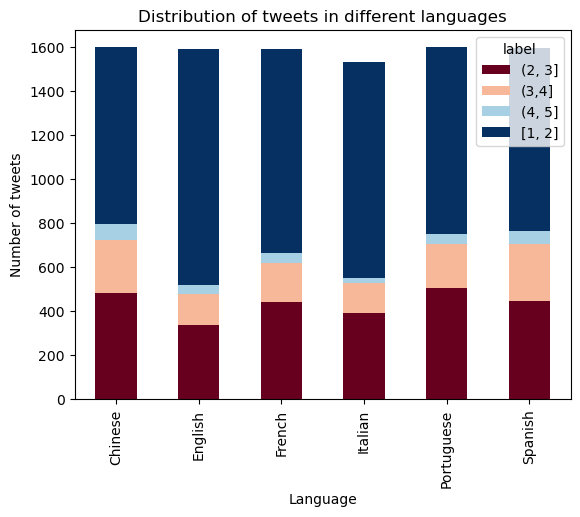

In [29]:
# draw histogram with label in [1,2], [2, 3], [3, 4], [4, 5] with different languages
new_df = df.loc[:, ['label', 'language']]
new_df['label'] = new_df['label'].apply(lambda x: "[1, 2]" if x <= 2 else "(2, 3]" if x <= 3 else "(3,4]" if x <= 4 else "(4, 5]")
plot_df = new_df.groupby(['language', 'label']).size().unstack()
plot_df.plot(kind='bar', stacked=True, colormap='RdBu')
plt.ylabel('Number of tweets')
plt.xlabel('Language')
plt.title('Distribution of tweets in different languages')
plt.show()

<AxesSubplot:>

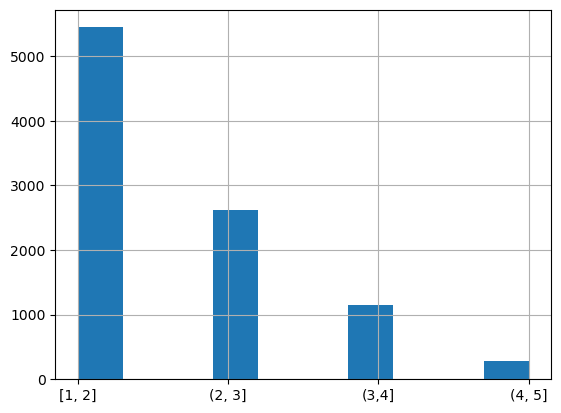

In [30]:
# histogram of the number of tweets
new_df['label'].hist()
plt.ylabel('Number of tweets')
plt.xlabel('Label')


In [3]:
df.groupby('language').size().sort_values(ascending=False)

language
Chinese       1596
Portuguese    1596
Spanish       1592
French        1588
English       1587
Italian       1532
dtype: int64

In [4]:
df.shape

(9491, 3)

<AxesSubplot:>

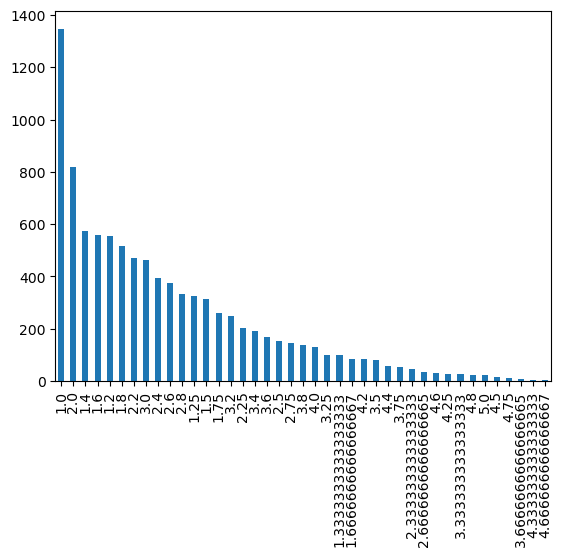

In [8]:
df['label'].value_counts().plot(kind='bar')

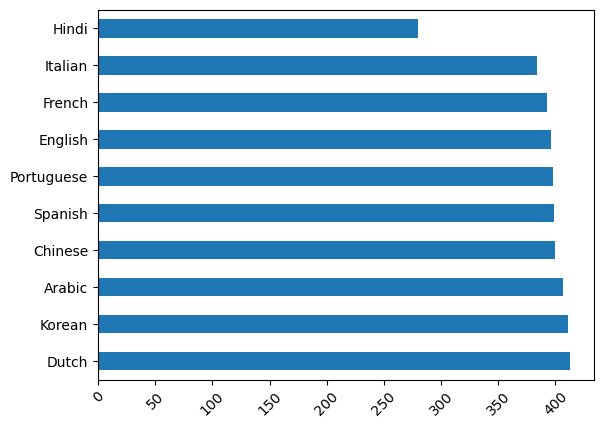

In [4]:
dev_df = pd.read_csv('test.csv')
dev_df['language'].value_counts().plot(kind='barh')
plt.xticks(rotation=45)
plt.show()


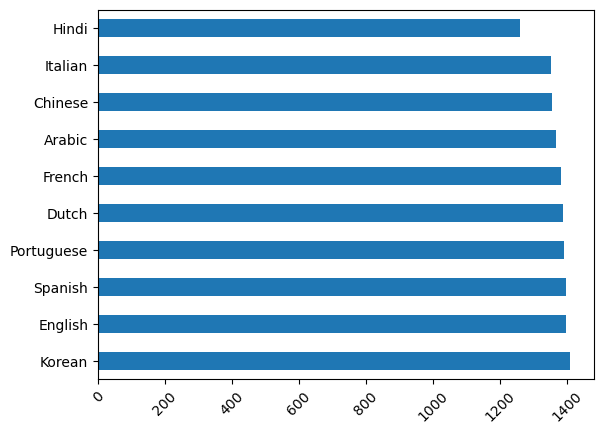

In [35]:
test_df = pd.read_csv('semeval_test.csv')
test_df['language'].value_counts().plot(kind='barh')
# rotate the graph
plt.xticks(rotation=45)
plt.show()

In [5]:
# random assign label to test data, by 1, 1.1, 1.2, 1.3, 1.4..., 5
labels = df['label'].unique()


def random_label(dev_df, labels):
    np.random.seed(300)
    dev_df['rand_label'] = np.random.choice(labels, dev_df.shape[0])

    # pearson correlation for different languages in dev data
    languages = dev_df['language'].unique()
    corr = []
    for lang in languages:
        lang_df = dev_df[dev_df['language'] == lang]
        corr.append(pearsonr(lang_df['rand_label'], lang_df['label'])[0])
    corr = np.array(corr)
    lang_corr = pd.DataFrame({'language': languages, 'corr': corr})
    return lang_corr


In [6]:
random_label(df, labels)

,language,corr
0,English,0.012701
1,Spanish,0.081860
2,Portuguese,-0.000828
3,Italian,0.025090
4,French,0.010133
5,Chinese,0.016256


In [10]:
# most frequent label in data 
def frequent_label(dev_df):
    dev_df['freq_label'] = dev_df['label'].mean()
    languages = dev_df['language'].unique()
    corr = []
    for lang in languages:
        lang_df = dev_df[dev_df['language'] == lang]
        corr.append(lang_df['label'].corr(lang_df['freq_label']))
    corr = np.array(corr)
    lang_corr = pd.DataFrame({'language': languages, 'corr': corr})
    return lang_corr

In [11]:
frequent_label(df)

,language,corr
0,English,1.365650e-16
1,Spanish,2.392165e-16
2,Portuguese,-1.300971e-16
3,Italian,-1.388904e-16
4,French,1.199435e-17
5,Chinese,2.565374e-17
